In [ ]:
from google.colab import files
import io
import pandas as pd

uploaded = files.upload()  # Choose bank-additional-full.csv
fn = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[fn]), sep=';')
print('Loaded:', fn, 'shape =', df.shape)


Saving bank-additional-full.csv to bank-additional-full.csv
Loaded: bank-additional-full.csv shape = (41188, 21)


In [2]:
# basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# sklearn & utils
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import joblib

pd.options.display.max_columns = 200


In [3]:
# basic exploration
print('rows, cols:', df.shape)
display(df.head())
display(df.info())
display(df.describe(include='all').T)

# target distribution
print('\nTarget counts:\n', df['y'].value_counts())
print('\nTarget percent:\n', df['y'].value_counts(normalize=True).round(3))


rows, cols: (41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,41188.0,NaN,NaN,NaN,40.02406,10.42125,17.0,32.0,38.0,47.0,98.0
job,41188,12,admin.,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41188,4,married,24928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41188,8,university.degree,12168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,41188,3,no,32588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,41188,3,yes,21576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,41188,3,no,33950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,41188,2,cellular,26144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,41188,10,may,13769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,41188,5,thu,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Target counts:
 y
no     36548
yes     4640
Name: count, dtype: int64

Target percent:
 y
no     0.887
yes    0.113
Name: proportion, dtype: float64


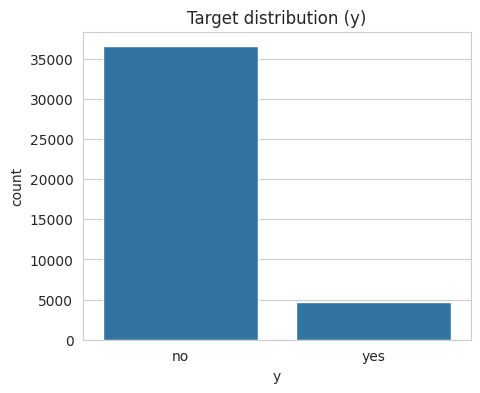

<Figure size 1200x800 with 0 Axes>

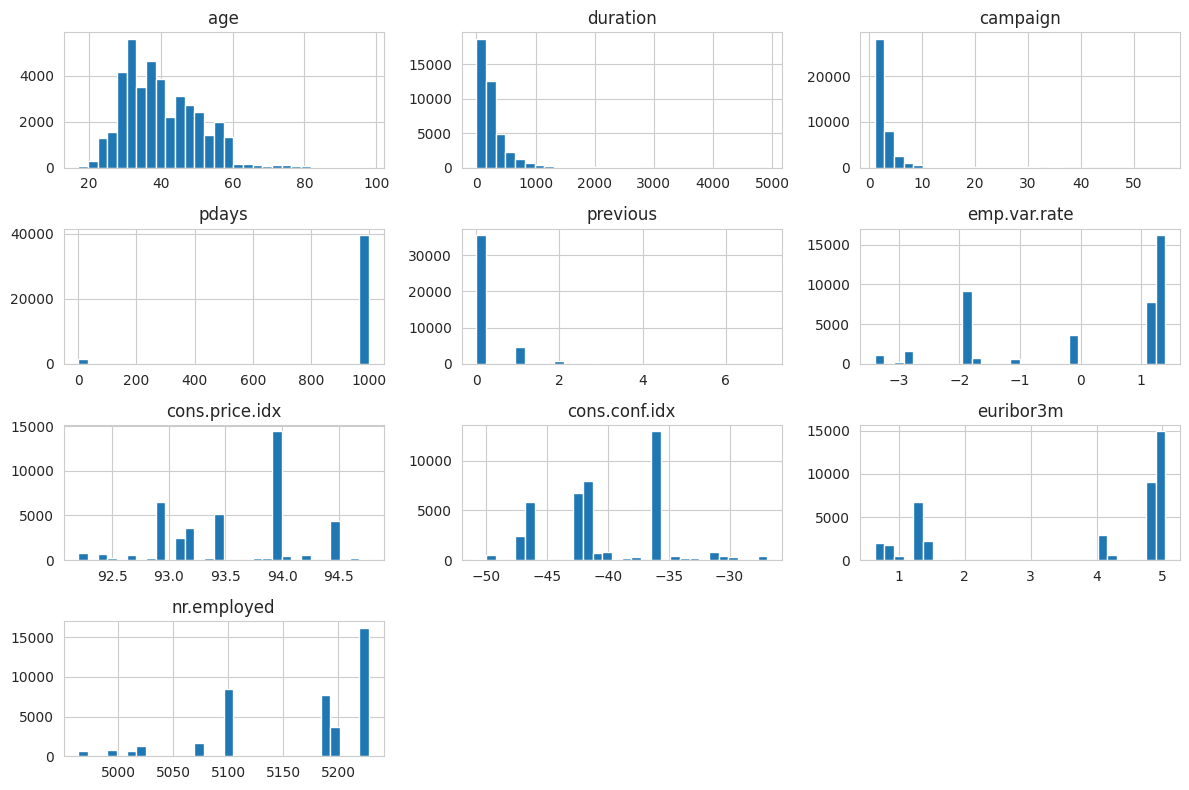

job : 12 unique, top values:


,count
job,
admin.,10422
blue-collar,9254
technician,6743
services,3969
management,2924


----
marital : 4 unique, top values:


,count
marital,
married,24928
single,11568
divorced,4612
unknown,80


----
education : 8 unique, top values:


,count
education,
university.degree,12168
high.school,9515
basic.9y,6045
professional.course,5243
basic.4y,4176


----
default : 3 unique, top values:


,count
default,
no,32588
unknown,8597
yes,3


----
housing : 3 unique, top values:


,count
housing,
yes,21576
no,18622
unknown,990


----
loan : 3 unique, top values:


,count
loan,
no,33950
yes,6248
unknown,990


----
contact : 2 unique, top values:


,count
contact,
cellular,26144
telephone,15044


----
month : 10 unique, top values:


,count
month,
may,13769
jul,7174
aug,6178
jun,5318
nov,4101


----
day_of_week : 5 unique, top values:


,count
day_of_week,
thu,8623
mon,8514
wed,8134
tue,8090
fri,7827


----
poutcome : 3 unique, top values:


,count
poutcome,
nonexistent,35563
failure,4252
success,1373


----
y : 2 unique, top values:


,count
y,
no,36548
yes,4640


----


In [4]:
# target barplot
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='y')
plt.title('Target distribution (y)')
plt.show()

# histograms for numeric cols
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
plt.figure(figsize=(12,8))
df[num_cols].hist(bins=30, figsize=(12,8))
plt.tight_layout()
plt.show()

# check unknowns in categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
for c in cat_cols:
    print(c, ':', df[c].value_counts().shape[0], 'unique, top values:')
    display(df[c].value_counts().head())
    print('----')


In [5]:
# pdays: 999 means "not previously contacted" — convert into a flag
df['pdays_contacted'] = (df['pdays'] != 999).astype(int)
# optionally make pdays more sensible: replace 999 with -1 (so it doesn't look like huge positive)
df['pdays_clean'] = df['pdays'].replace(999, -1)

# duration: keep for EDA but drop before modelling
print('Keep duration for EDA, but we will drop it when training the model as it leaks the label.')

# show new columns
display(df[['pdays','pdays_contacted','pdays_clean']].head())


Keep duration for EDA, but we will drop it when training the model as it leaks the label.


,pdays,pdays_contacted,pdays_clean
0,999,0,-1
1,999,0,-1
2,999,0,-1
3,999,0,-1
4,999,0,-1


In [6]:
# 1) Drop duration for modelling
df_model = df.copy()
df_model = df_model.drop(columns=['duration'])   # duration leaks target

# 2) Target encoding
y = df_model['y'].map({'no':0, 'yes':1})

# 3) Drop the original target column from features
X = df_model.drop(columns=['y'])

# 4) List categorical columns to get dummies
cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()

print('categorical cols:', cat_cols)
print('numeric cols:', num_cols)

# 5) One-hot encoding (Decision Tree can handle many columns; get_dummies is straightforward)
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

print('X_encoded shape:', X_encoded.shape)


categorical cols: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numeric cols: ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'pdays_contacted', 'pdays_clean']
X_encoded shape: (41188, 54)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.20, random_state=42, stratify=y)

print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)
print('Train target distribution:', y_train.value_counts(normalize=True).round(3))


Train shape: (32950, 54) Test shape: (8238, 54)
Train target distribution: y
0    0.887
1    0.113
Name: proportion, dtype: float64


Accuracy: 0.844136926438456

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91      7310
           1       0.32      0.34      0.33       928

    accuracy                           0.84      8238
   macro avg       0.62      0.62      0.62      8238
weighted avg       0.85      0.84      0.85      8238



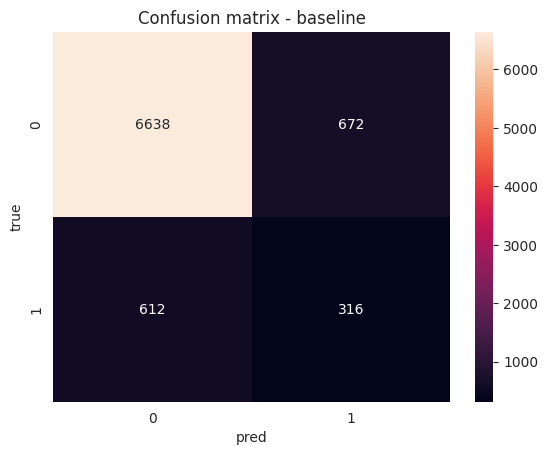

In [8]:
clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')  # balance classes
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification report:\n', classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion matrix - baseline')
plt.xlabel('pred')
plt.ylabel('true')
plt.show()


In [9]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}

grid = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    param_grid=param_grid,
    cv=5,
    scoring='f1',   # optimize F1 due to imbalance
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)
print('Best params:', grid.best_params_)
best = grid.best_estimator_

# Evaluate best
y_pred_best = best.predict(X_test)
print('Test accuracy (best):', accuracy_score(y_test, y_pred_best))
print('\nClassification report (best):\n', classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 160 candidates, totalling 800 fits
Best params: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 20}
Test accuracy (best): 0.8380674921097354

Classification report (best):
               precision    recall  f1-score   support

           0       0.95      0.86      0.90      7310
           1       0.37      0.64      0.47       928

    accuracy                           0.84      8238
   macro avg       0.66      0.75      0.69      8238
weighted avg       0.88      0.84      0.86      8238



ROC AUC: 0.7867808475635644


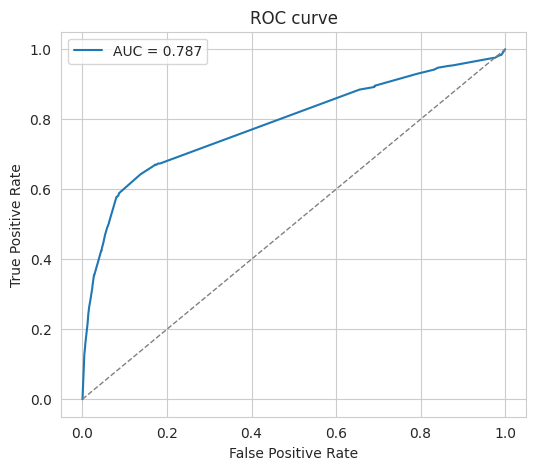

In [10]:
from sklearn.metrics import roc_auc_score, roc_curve

y_proba = best.predict_proba(X_test)[:,1]
print('ROC AUC:', roc_auc_score(y_test, y_proba))

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba):.3f}')
plt.plot([0,1],[0,1],'--', linewidth=1, color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
plt.show()


nr.employed              0.650857
cons.conf.idx            0.131110
euribor3m                0.047662
cons.price.idx           0.039978
month_oct                0.020754
age                      0.020711
campaign                 0.020436
pdays                    0.015318
pdays_clean              0.014908
default_unknown          0.012010
previous                 0.006490
contact_telephone        0.004736
emp.var.rate             0.002514
job_entrepreneur         0.002151
education_high.school    0.002075
job_self-employed        0.000989
job_blue-collar          0.000965
day_of_week_mon          0.000908
day_of_week_wed          0.000833
job_housemaid            0.000748
dtype: float64


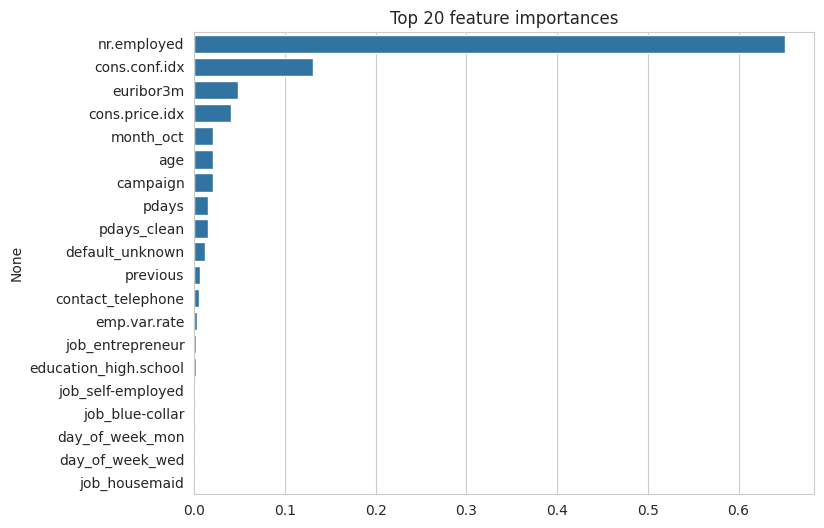

In [11]:
importances = pd.Series(best.feature_importances_, index=X_encoded.columns)
importances_sorted = importances.sort_values(ascending=False).head(20)
print(importances_sorted)
plt.figure(figsize=(8,6))
sns.barplot(x=importances_sorted.values, y=importances_sorted.index)
plt.title('Top 20 feature importances')
plt.show()


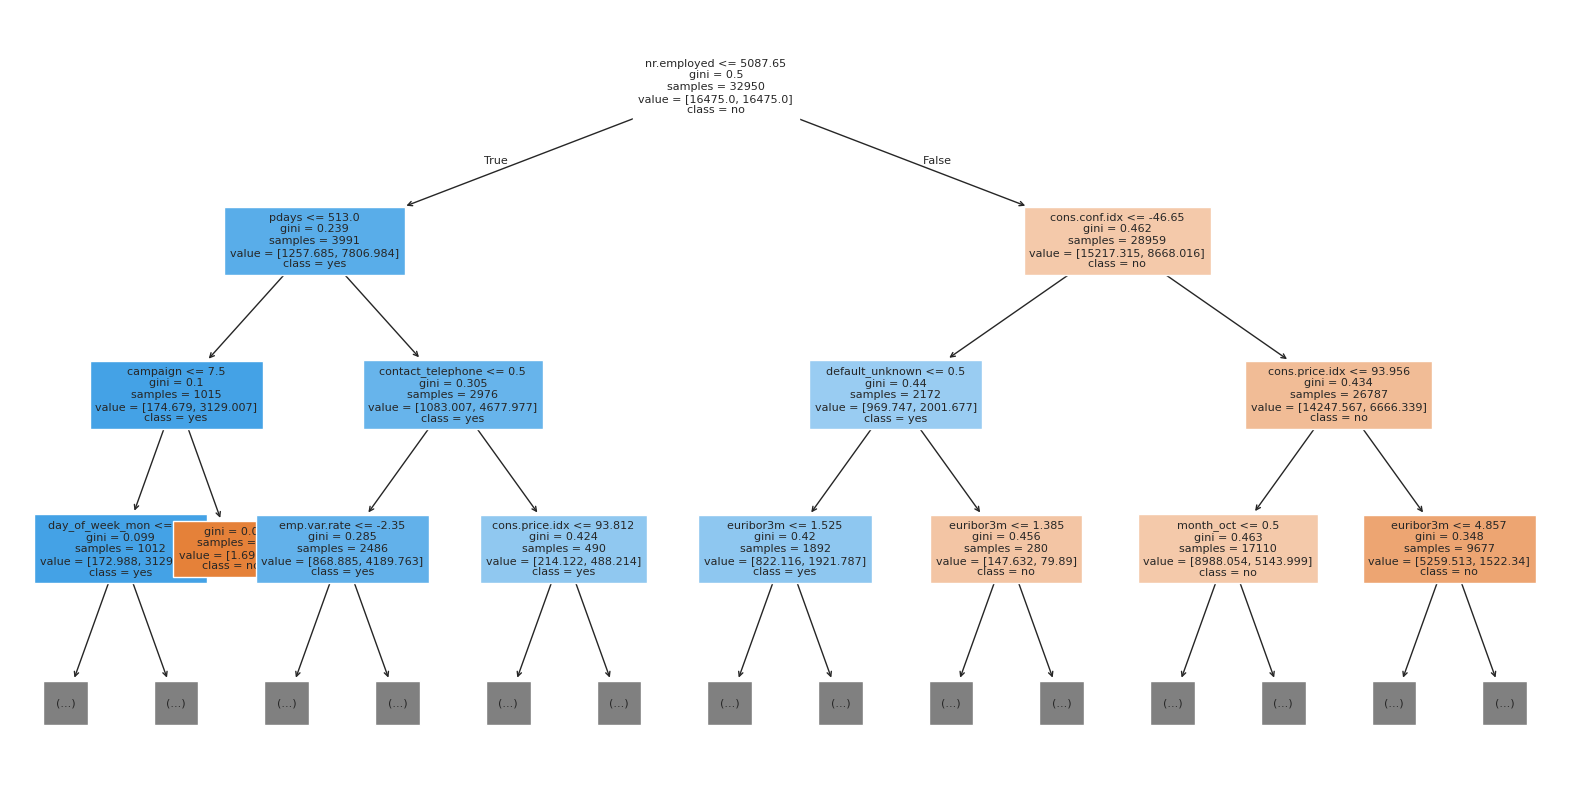

In [12]:
plt.figure(figsize=(20,10))
# limit tree depth for legibility in plot
plot_tree(best, feature_names=X_encoded.columns, class_names=['no','yes'], filled=True, max_depth=3, fontsize=8)
plt.show()


In [13]:
joblib.dump(best, 'decision_tree_task3_best.pkl')
# save columns so we can transform new data the same way
joblib.dump(X_encoded.columns.tolist(), 'model_columns_task3.pkl')
print('Saved model and column list.')


Saved model and column list.
